<IPython.core.display.Javascript object>


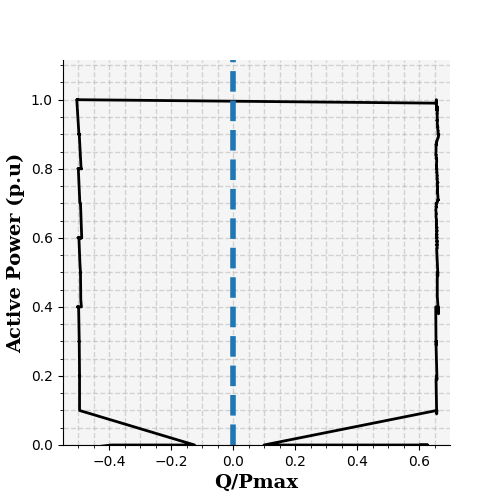

Text(0.5, 0, 'Q/Pmax')

In [11]:
p=[data['P/P'][i] for i in reversed(range(360))]
p=p+data['P/P'][360:].tolist()
q=[data['Q/P'][i] for i in reversed(range(360))]
q=q+data['Q/P'][360:].tolist()
fig, ax = plt.subplots(figsize=(5,5))
l1 = ax.plot(q,f,label='V(Q)',linewidth=2,c='k')
# l2 = ax.plot(data['Q/Pmax'],0.85*np.ones(len(data['V(p.u)'])),linewidth=2,c=l1[0].get_color())
ax.axvline(linewidth=4, ls='--')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_facecolor('whitesmoke')
ax.grid(which='both',ls='--',lw=1,alpha=0.5)
ax.set_ylim(0,1.115)
ax.set_xlim(-0.55,0.7)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.set_ylabel('Active Power (p.u)',fontdict=font)
ax.set_xlabel('Q/Pmax',fontdict=font)


<IPython.core.display.Javascript object>


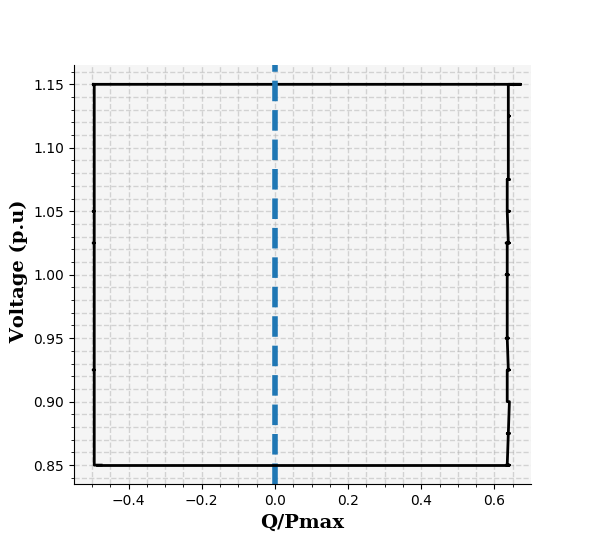

In [51]:
fig, ax = plt.subplots(figsize=(5,5))
l1 = ax.plot(data['Q/Pmax'],data['V(p.u)'],label='V(Q)',linewidth=2,c='k')
ax.axvline(linewidth=4, ls='--')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_facecolor('whitesmoke')
ax.grid(which='both',ls='--',lw=1,alpha=0.5)
# ax.set_ylim(0,1.115)
ax.set_xlim(-0.55,0.7)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.set_ylabel(' Voltage (p.u)',fontdict=font)
ax.set_xlabel('Q/Pmax',fontdict=font)
ax.axhline(y=0.85,xmin=0.05,xmax=0.95,linewidth=2, ls='-',c='k')

Please enter the path of you csv file:/home/spiros/Data/Kazakstan/mkat_24_01.csv


<IPython.core.display.Javascript object>


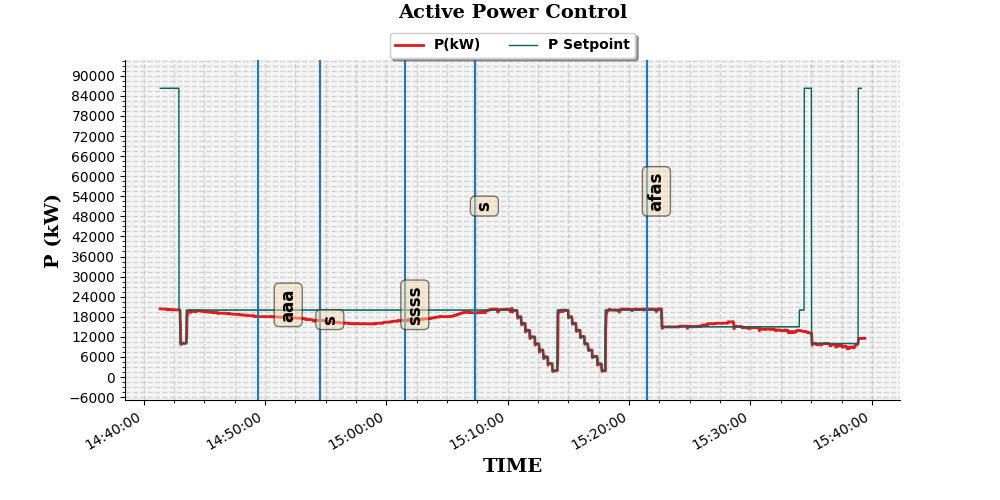

7

In [38]:
import tkinter as tk
from tkinter import font,simpledialog
from plot_maplot_v1 import *
%matplotlib notebook
csv=input("Please enter the path of you csv file:")
data = get_data_from_csv(csv)
(time,m,s,en)=get_traces(data)
fig,axes,lines,leg= plot_P(time,m['P'].iloc[:,0],s['P'].iloc[:,0],en['P'].iloc[:,0],200)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
def onpick(event):
    if event.artist in lines:
        global k
        global x
        global y
        x = event.mouseevent.xdata
        y = event.mouseevent.ydata
        L =  axes[0].axvline(x=x)
        w=tk.Tk()
        w.withdraw()
        ask_text = simpledialog.askstring("Text for line","Insert text")
        k=axes[0].text(x,(axes[0].get_ylim()[1]-axes[0].get_ylim()[0])/2,ask_text,rotation=90,fontdict={'size':12,'weight':'bold'},bbox=props)
        fig.canvas.draw()
        
fig.canvas.mpl_connect('pick_event',onpick)

In [44]:
k.set_position((x+100/84000,y))

<IPython.core.display.Javascript object>


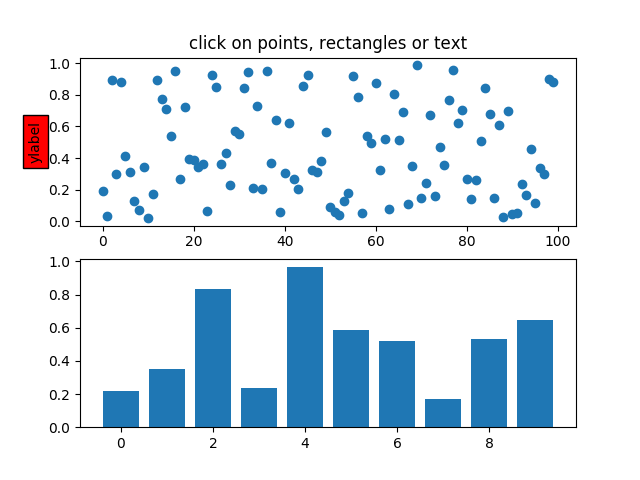

7

In [11]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle
from matplotlib.text import Text
from matplotlib.image import AxesImage
import numpy as np
from numpy.random import rand



# simple picking, lines, rectangles and text
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.set_title('click on points, rectangles or text', picker=True)
ax1.set_ylabel('ylabel', picker=True, bbox=dict(facecolor='red'))
line, = ax1.plot(rand(100), 'o', picker=5)  # 5 points tolerance

# pick the rectangle
bars = ax2.bar(range(10), rand(10), picker=True)
for label in ax2.get_xticklabels():  # make the xtick labels pickable
    label.set_picker(True)

def onpick1(event):
    if isinstance(event.artist, Line2D):
        thisline = event.artist
        xdata = thisline.get_xdata()
        ydata = thisline.get_ydata()
        ind = event.ind
        print('onpick1 line:', np.column_stack([xdata[ind], ydata[ind]]))
    elif isinstance(event.artist, Rectangle):
        patch = event.artist
        print('onpick1 patch:', patch.get_path())
    elif isinstance(event.artist, Text):
        text = event.artist
        print('onpick1 text:', text.get_text())

fig.canvas.mpl_connect('pick_event', onpick1)


In [13]:
a=[1,2,3]

In [16]:
max(a)

3

In [1]:
import matplotlib.dates as mdates

In [32]:
mdates.num2date(693596.6883640904+2/86400)

datetime.datetime(1900, 1, 1, 16, 31, 16, 657400, tzinfo=datetime.timezone.utc)

<IPython.core.display.Javascript object>


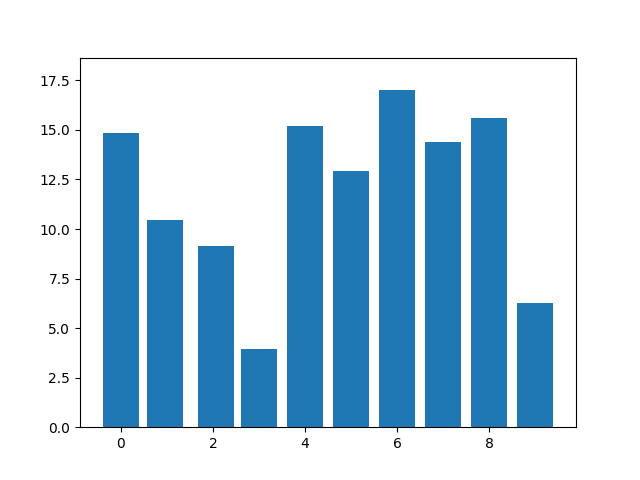

In [16]:
from matplotlib.text import Text
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np


class DraggableRectangle:
    def __init__(self, rect):
        self.rect = rect
        self.press = None

    def connect(self):
        'connect to all the events we need'
        self.cidpress = self.rect.figure.canvas.mpl_connect(
            'button_press_event', self.on_press)
        self.cidrelease = self.rect.figure.canvas.mpl_connect(
            'button_release_event', self.on_release)
        self.cidmotion = self.rect.figure.canvas.mpl_connect(
            'motion_notify_event', self.on_motion)

    def on_press(self, event):
        'on button press we will see if the mouse is over us and store some data'
        if event.inaxes != self.rect.axes: return

        contains, attrd = self.rect.contains(event)
        if not contains: return
        print('event contains', self.rect.xy)
        x0, y0 = self.rect.xy
        self.press = x0, y0, event.xdata, event.ydata

    def on_motion(self, event):
        'on motion we will move the rect if the mouse is over us'
        if self.press is None: return
        if event.inaxes != self.rect.axes: return
        x0, y0, xpress, ypress = self.press
        dx = event.xdata - xpress
        dy = event.ydata - ypress
        #print('x0=%f, xpress=%f, event.xdata=%f, dx=%f, x0+dx=%f' %
        #      (x0, xpress, event.xdata, dx, x0+dx))
        self.rect.set_x(x0+dx)
        self.rect.set_y(y0+dy)

        self.rect.figure.canvas.draw()


    def on_release(self, event):
        'on release we reset the press data'
        self.press = None
        self.rect.figure.canvas.draw()

    def disconnect(self):
        'disconnect all the stored connection ids'
        self.rect.figure.canvas.mpl_disconnect(self.cidpress)
        self.rect.figure.canvas.mpl_disconnect(self.cidrelease)
        self.rect.figure.canvas.mpl_disconnect(self.cidmotion)

fig = plt.figure()
ax = fig.add_subplot(111)
rects = ax.bar(range(10), 20*np.random.rand(10))
drs = []
for rect in rects:
    dr = DraggableRectangle(rect)
    dr.connect()
    drs.append(dr)

plt.show()

In [1]:
from plot_maplot_v1 import *
import tkinter as tk
from tkinter import colorchooser,filedialog,simpledialog,messagebox,font
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg,NavigationToolbar2Tk
from matplotlib.lines import Line2D
from matplotlib.text import Text
import matplotlib as mpl
import sys
import re
import numpy as np
class move_text:
    def __init__(self,text,figure):
        self.text=text
        self.figure=figure
        self.pick=None
    def connect(self):
        'connect to all the events we need'
        self.cidpress = self.figure.canvas.mpl_connect('pick_event', self.on_pick)
        self.cidrelease = self.figure.canvas.mpl_connect('button_release_event', self.on_release)
        self.cidmotion = self.figure.canvas.mpl_connect('motion_notify_event', self.on_motion)

    def on_pick(self, event):
        'on button pick we will see if the mouse is over us and store some data'
#         if event.inaxes != self.text.get_bbox_patch(): 
#             return
#         if isinstance(event.artist, Text):
#         if self.text.contains(event)==False:
#             return
        
        x0, y0 = self.text.get_position()
        self.pick = x0, y0, event.mouseevent.xdata,event.mouseevent.ydata

    def on_motion(self, event):
        'on motion we will move the rect if the mouse is over us'
        if self.pick is None:
            return
        if self.text.contains(event)==False:
            return
        # if isinstance(event.artist, Text)==False:
        #     return

        self.text.set_position((event.xdata,event.ydata))
        # self.text.set_y(event.ydata)

        self.figure.canvas.draw()

    def on_release(self, event):
        'on release we reset the press data'
        self.pick = None
        self.figure.canvas.draw()


    def disconnect(self):
        'disconnect all the stored connection ids'
        self.figure.canvas.mpl_disconnect(self.cidpress)
        self.figure.canvas.mpl_disconnect(self.cidrelease)
        self.figure.canvas.mpl_disconnect(self.cidmotion)

Please enter the path of you csv file:/home/spiros/Data/Kazakstan/mkat_24_01.csv


<IPython.core.display.Javascript object>


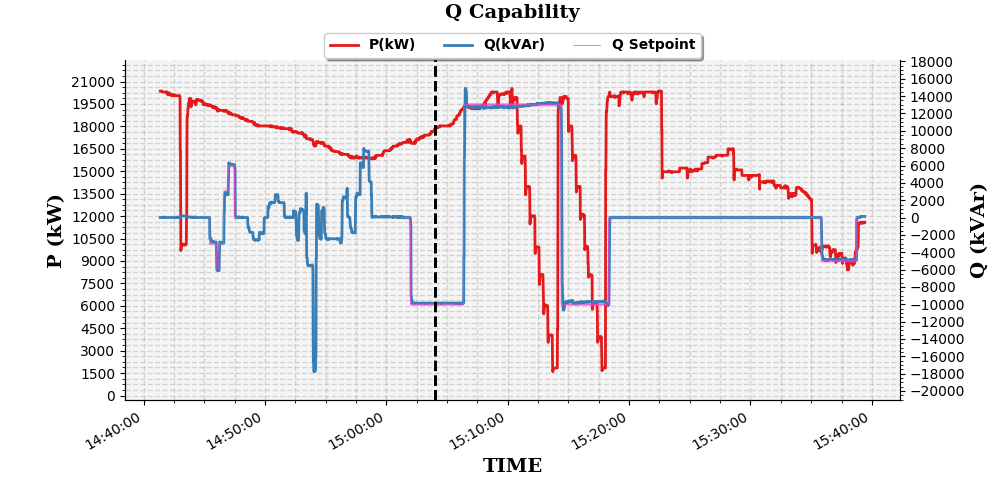

/home/spiros/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


7

In [2]:
%matplotlib notebook
csv=input("Please enter the path of you csv file:")
data = get_data_from_csv(csv)
(time,m,s,en)=get_traces(data)
fig,axes,lines,leg= plot_PQ(time,m['P'].iloc[:,0],m['Q'].iloc[:,0],s['Q'].iloc[:,1-1],en['Q'].iloc[:,0],200)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
VLs=[]
VL_texts=[]
global oldx
oldx=None
drs=[]
def onpick(event):
    global oldx
    if event.artist in lines:
        x = event.mouseevent.xdata
        y = event.mouseevent.ydata
        event_ax=event.artist.axes
        ytext=y+(event_ax.get_ylim()[1]-y)/2
        xtext=x-2/86400
        if x != oldx:
            master=tk.Tk()
            master.withdraw()
            vline = tk.messagebox.askquestion ('Vertical Line Text','Would you like to add text?',parent = master)
            if vline == 'no':
                VL =  event_ax.axvline(x=x,linewidth=2, ls='--',c='k')
                VLs.append(VL)
                VL_text = event_ax.text(x+0.001,y+20*deadband,"",rotation=90,fontdict={'size':12,'weight':'bold'})
                VL_texts.append(VL_text)
                oldx=x
                fig.canvas.draw()
            else:
                master=tk.Tk()
                master.withdraw()
                ask_text = simpledialog.askstring("Text for line","Insert text",parent=master)
                VL =  event_ax.axvline(x=x,linewidth=2, ls='--',c='k')
                VLs.append(VL)
                VL_text = event_ax.text(xtext,ytext,ask_text,rotation=90,fontdict={'size':12,'weight':'bold'},bbox=props,picker=5)
                VL_texts.append(VL_text)
                dr = move_text(VL_text,fig,xlim_0,ylim_0)
                dr.connect()
                drs.append(dr)
                oldx=x
                fig.canvas.draw()
                
fig.canvas.mpl_connect('pick_event',onpick)

In [11]:
VLs[0].

AttributeError: 'Line2D' object has no attribute 'x'

In [ ]:
drs[0].text.get_bbox_patch

In [ ]:
drs[0].text.get_contains

In [18]:
101586.5016/13445.2722705882

7.555555555555575

In [20]:
0.04434374999254942/0.001487661269493

29.807692720038293